### Problem 1

In [4]:
import numpy as np
a=np.array([[2,5,0,8],
            [1,4,2,6],
            [7,8,9,3],
            [1,5,7,8]])
detA=np.linalg.det(a) 
detA

179.0

- The determinant of A is 179
- A has an innverse because A is a square matrix and the determinant of the A is not zero

In [5]:
invA=np.linalg.inv(a)
invA

array([[ 0.96089385, -1.91620112,  0.07821229,  0.44692737],
       [-1.03351955,  2.3575419 ,  0.06703911, -0.75977654],
       [-0.00558659, -0.27374302,  0.01117318,  0.20670391],
       [ 0.53072626, -0.99441341, -0.06145251,  0.36312849]])

In [6]:
b=np.array([[4],
            [2],
            [1],
            [1]])
x=np.linalg.solve(a,b)
x

array([[ 0.53631285],
       [-0.11173184],
       [-0.35195531],
       [ 0.43575419]])

### Problem 2

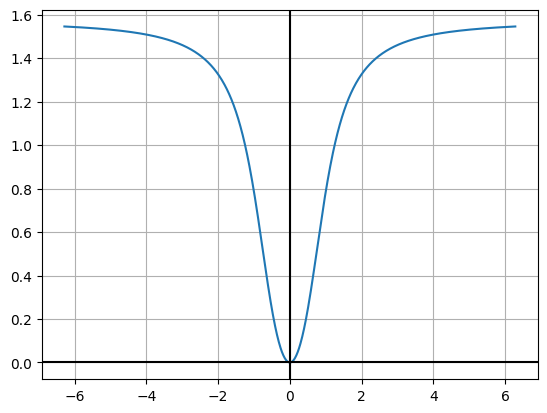

In [7]:
import matplotlib.pyplot as plt
xVals = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
fig, ax = plt.subplots()
ax.plot(xVals, np.arctan(xVals**2))
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

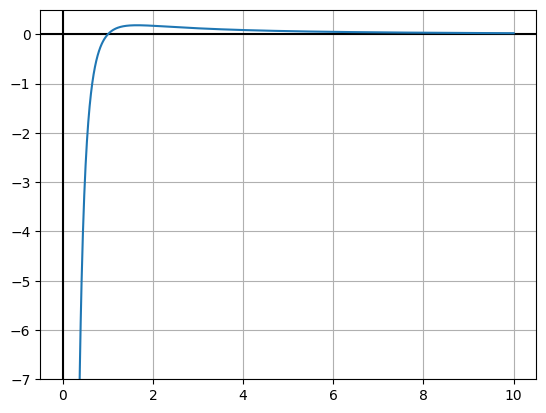

In [8]:
xVals = np.linspace(0.1, 10, 1000)
fig, ax = plt.subplots()
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.ylim([-7,0.5])
ax.plot(xVals, np.log(xVals)/(xVals**2))

### Problem 3

Text(0.5, 1.0, 'Density Histogram of the Data')

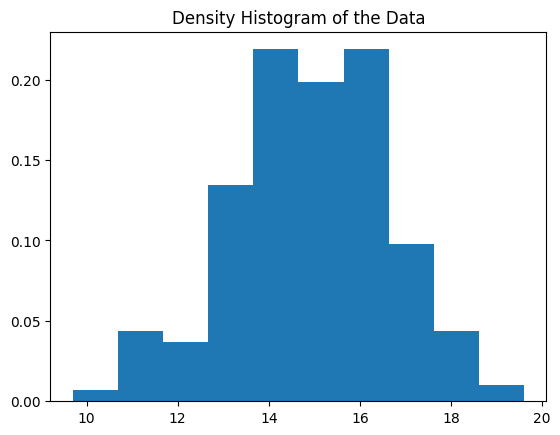

In [9]:
npArray=np.load("jan8data.npy")
plt.hist(npArray, density = True)
plt.title("Density Histogram of the Data")

In [10]:
mean=npArray.mean()
std=npArray.std()
print("Mean of the data:", end=" ")
print(mean)
print("Standard of the data:", end=" ")
print(std)

Mean of the data: 14.942329301785364
Standard of the data: 1.7242887930982718


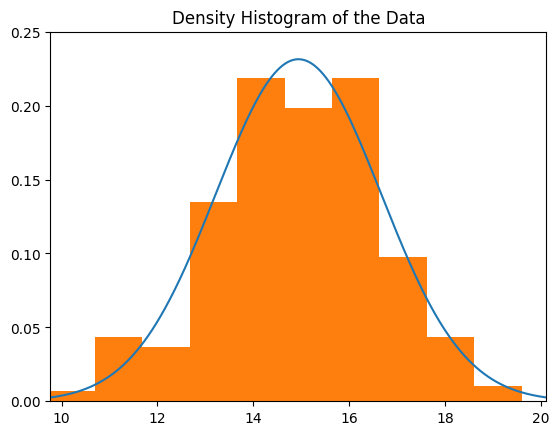

In [11]:
def denFunc(x):
    return (np.exp((-1/2)*(((x-mean)/std)**2)))/(std*np.sqrt(2*np.pi))
xVals = np.linspace(mean-3*std, mean+3*std, 1000)
fig, ax = plt.subplots()
ax.plot(xVals, denFunc(xVals))
plt.xlim(mean-3*std, mean+3*std)
plt.ylim(0,0.25)
plt.hist(npArray, density = True)
plt.title("Density Histogram of the Data")
plt.show()

### Problem 4

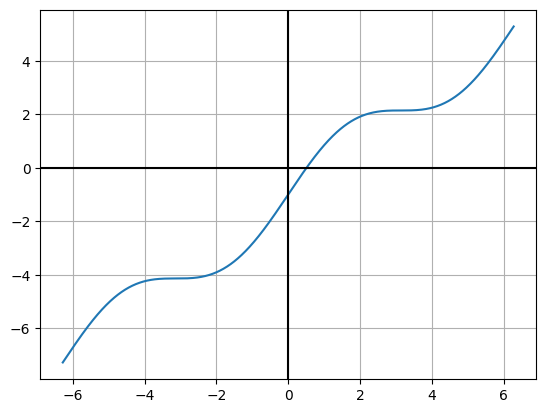

In [13]:
xVals = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
fig, ax = plt.subplots()
ax.plot(xVals, np.sin(xVals)+xVals-1)
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

In [14]:
from sympy import *
x = Symbol('x')
fx = sin(x)+x-1
df = fx.diff(x)
f = lambdify(x,fx, 'numpy')
d = lambdify(x, df, 'numpy')
def mynewton(x0, n):
    while n>0:
        x0=x0-(f(x0)/d(x0))
        n-=1
        print(x0)        
    return x0
mynewton(0.8, 10)

0.49508219184293567
0.510941206584474
0.5109734292529751
0.510973429388569
0.5109734293885692
0.5109734293885692
0.5109734293885692
0.5109734293885692
0.5109734293885692
0.5109734293885692


0.5109734293885692

### Problem 5

In [16]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/aleahy-work/CS-STAT323-W24/main/jan8separate.csv", header = None)
data

,0,1,2,3
0,2.687328,1.440732,1.985332,1.0
1,3.668187,0.776351,2.987730,1.0
2,2.181974,-0.564201,1.669553,1.0
3,3.405430,1.972887,0.891892,1.0
4,3.436021,1.076647,1.455273,1.0
...,...,...,...,...
95,-2.195255,-3.266849,-1.883087,-1.0
96,-3.762492,-2.908563,-1.708243,-1.0
97,0.003613,-2.909149,-1.715342,-1.0
98,-0.700076,-2.535729,-1.889110,-1.0


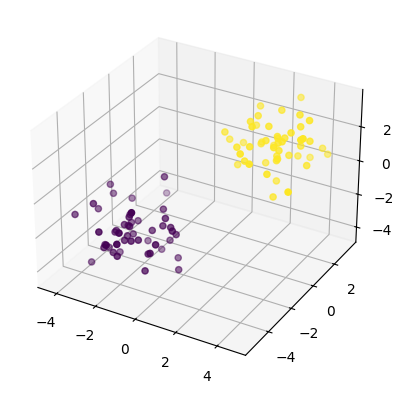

In [17]:
points = data.to_numpy()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0], points[:,1], zs = points[:,2], c=points[:,3])

In [18]:
w = np.zeros(4)

In [23]:
while True:
    m = 0
    for x in points:
        if x[3]*np.dot(w, x) <= 0:
            w = w + x[3]*x
            m = m + 1
    if m == 0:
        break
w

array([2.68732827, 1.44073213, 1.98533201, 1.        ])

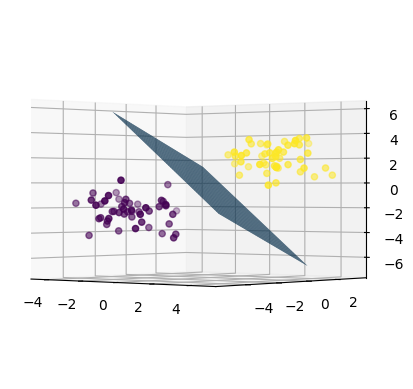

In [53]:
x = np.linspace(-3,3,300)
y = np.linspace(-3,3,300)

X,Y = np.meshgrid(x,y)
Z = (- w[0]*X - w[1]*Y - w[3]) / w[2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.scatter(points[:,0], points[:,1], zs = points[:,2], c=points[:,3])
ax.view_init(0, -50, 0)